### multi-classify
- 기계학습프로그래밍 기말고사 실기시험 (2024.11.12)
- 202334734 컴퓨터공학전공 임규연

In [3]:
import pandas as pd
import numpy as np
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_train = pd.read_csv("multi-train.csv")
df_test = pd.read_csv("multi-test.csv")

In [7]:
df_train.head(10)

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,11,96,6.0,69,990.04,3,0,1.0,1,2
1,-22,84,29.5,70,986.24,6,4,2.5,1,3
2,-6,70,18.5,83,999.96,0,4,3.0,1,3
3,24,38,3.5,16,1010.72,5,3,9.0,1,0
4,26,98,12.0,63,1008.53,3,4,2.5,0,2
5,28,72,8.0,71,1003.70,1,1,2.5,1,2
6,10,92,11.5,87,1006.00,1,4,3.5,0,2
7,-3,75,13.0,59,991.97,1,4,1.5,1,3
8,33,50,11.5,48,1017.08,1,3,6.5,1,1
9,-17,44,2.0,80,950.59,6,0,19.5,0,0


In [9]:
df_test.head(10)

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,-7,62,16.5,51,996.48,0,4,3.5,2,3
1,-9,65,13.5,85,986.87,1,4,2.0,2,3
2,18,55,11.0,34,1003.46,1,1,7.0,1,1
3,-7,88,18.0,56,990.88,1,4,5.0,1,3
4,23,41,8.0,18,1027.83,7,3,9.5,1,0
5,30,61,1.5,11,1020.86,7,3,7.0,2,0
6,-2,76,17.5,78,995.71,0,4,4.5,2,3
7,3,79,7.5,80,993.59,0,4,4.5,2,3
8,34,43,2.0,1,1016.47,10,1,9.5,0,0
9,31,62,9.5,74,1012.08,1,0,4.5,0,2


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112 entries, 0 to 2111
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           2112 non-null   int64  
 1   Humidity              2112 non-null   int64  
 2   Wind Speed            2112 non-null   float64
 3   Precipitation (%)     2112 non-null   int64  
 4   Atmospheric Pressure  2112 non-null   float64
 5   UV Index              2112 non-null   int64  
 6   Season                2112 non-null   int64  
 7   Visibility (km)       2112 non-null   float64
 8   Location              2112 non-null   int64  
 9   Weather Type          2112 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 165.1 KB


In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           528 non-null    int64  
 1   Humidity              528 non-null    int64  
 2   Wind Speed            528 non-null    float64
 3   Precipitation (%)     528 non-null    int64  
 4   Atmospheric Pressure  528 non-null    float64
 5   UV Index              528 non-null    int64  
 6   Season                528 non-null    int64  
 7   Visibility (km)       528 non-null    float64
 8   Location              528 non-null    int64  
 9   Weather Type          528 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 41.4 KB


In [15]:
df_train.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
count,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000
mean,18.422348,69.244318,9.864110,54.307765,1005.887827,3.911932,2.463068,5.426136,1.115530,1.533144
std,17.320088,20.029442,6.990655,32.213802,36.385233,3.822173,1.636729,3.393991,0.787699,1.125410
min,-22.000000,20.000000,0.000000,0.000000,802.470000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,58.000000,5.000000,20.000000,993.960000,1.000000,1.000000,3.000000,0.000000,1.000000
50%,20.000000,70.000000,9.000000,59.000000,1007.275000,3.000000,3.000000,5.000000,1.000000,2.000000
75%,30.000000,84.000000,13.500000,83.000000,1016.575000,7.000000,4.000000,7.500000,2.000000,3.000000
max,97.000000,109.000000,46.500000,109.000000,1199.210000,14.000000,4.000000,20.000000,2.000000,3.000000


In [17]:
df_test.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,18.017045,68.287879,9.910985,53.549242,1009.692992,4.168561,2.420455,5.541667,1.130682,1.534091
std,17.028876,19.909389,6.701527,30.918290,39.026949,4.023649,1.637244,3.459465,0.764466,1.125339
min,-20.000000,20.000000,0.000000,0.000000,820.160000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,57.000000,5.000000,20.750000,994.725000,1.000000,1.000000,3.000000,1.000000,1.000000
50%,21.000000,70.000000,9.000000,58.000000,1009.020000,3.000000,3.000000,5.000000,1.000000,2.000000
75%,30.000000,83.000000,14.000000,80.000000,1016.717500,7.000000,4.000000,7.500000,2.000000,3.000000
max,76.000000,108.000000,44.500000,109.000000,1194.970000,14.000000,4.000000,20.000000,2.000000,3.000000


In [99]:
print (df_train.isnull().sum())
print (df_test.isnull().sum())


Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64
Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64


<Axes: >

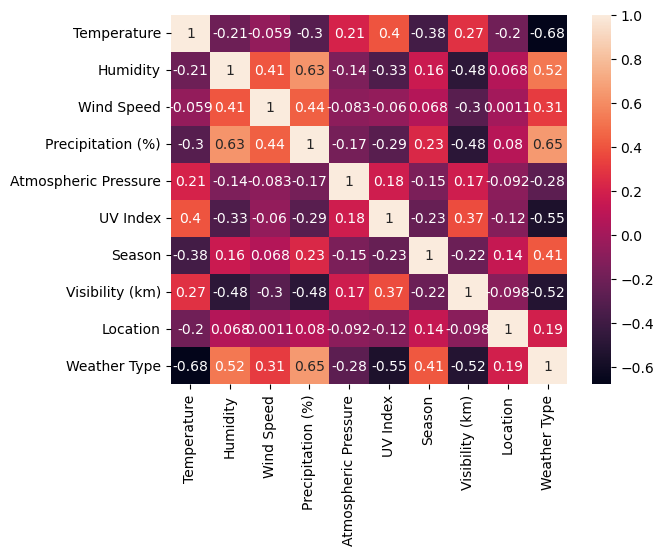

In [21]:
corr_train = df_train.corr()
corr_test = df_test.corr()

sns.heatmap (corr_train, annot=True)

<Axes: >

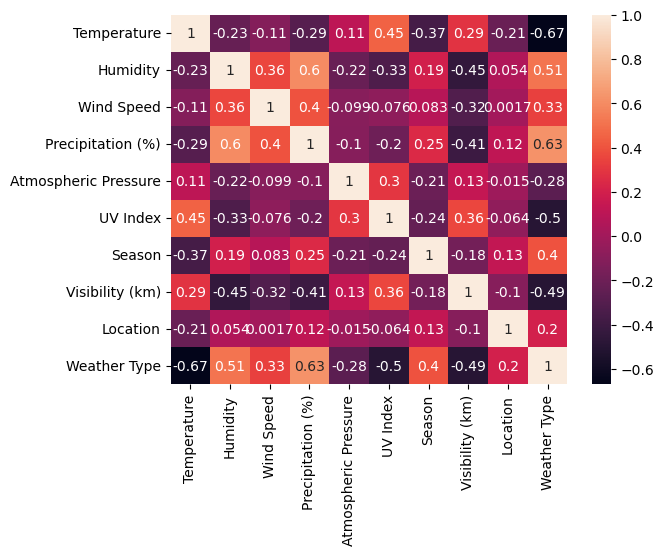

In [23]:
sns.heatmap (corr_test, annot=True)

In [25]:
df_train['Weather Type'].value_counts()

Weather Type
3    561
1    521
2    517
0    513
Name: count, dtype: int64

In [27]:
df_test['Weather Type'].value_counts()

Weather Type
3    140
1    130
2    130
0    128
Name: count, dtype: int64

In [29]:
X_train, y_train = df_train[[feature for feature in df_train.columns if feature != 'Weather Type']], df_train['Weather Type']
X_test, y_test = df_test[[feature for feature in df_test.columns if feature != 'Weather Type']], df_test['Weather Type']

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(2112, 9) (2112,)
(528, 9) (528,)


In [33]:
from sklearn.preprocessing import StandardScaler 

SS = StandardScaler()

X_train_scaled = SS.fit_transform(X_train)
X_test_scaled = SS.transform (X_test)

print (X_train_scaled)
print (X_test_scaled)


[[-0.42864138  1.33613398 -0.55288453 ... -1.50522875 -1.30441851
  -0.14670287]
 [-2.33439473  0.73687406  2.80954227 ...  0.93924885 -0.86235627
  -0.14670287]
 [-1.4103931   0.03773749  1.23564036 ...  0.93924885 -0.71500219
  -0.14670287]
 ...
 [-0.08214077 -2.20948721 -0.83904852 ...  0.32812945  2.08472534
   1.12311871]
 [-1.00614239  1.43601063 -1.1252125  ...  0.93924885 -1.00971035
  -0.14670287]
 [ 1.82361258  1.13638067  0.44868941 ...  0.32812945 -0.12558586
   1.12311871]]
[[-1.4681432  -0.36176913  0.94947638 ...  0.93924885 -0.56764811
   1.12311871]
 [-1.58364341 -0.21195415  0.5202304  ...  0.93924885 -1.00971035
   1.12311871]
 [-0.02439067 -0.71133741  0.16252543 ... -0.89410935  0.46383046
  -0.14670287]
 ...
 [ 1.41936187 -2.0097339  -1.1252125  ...  0.32812945  2.23207942
  -1.41652446]
 [ 0.03335943 -0.81121407 -1.0536715  ...  0.32812945  3.55826615
  -1.41652446]
 [ 0.84186085 -1.76004227  0.01944343 ... -0.89410935  1.20060086
   1.12311871]]


In [350]:
from sklearn.svm import SVC,LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score

In [58]:
# SVC

svc = SVC(max_iter=100)
svc.fit(X_train_scaled, y_train)
pred_train = svc.predict(X_train_scaled)
pred_test = svc.predict(X_test_scaled)
print (classification_report(y_test, pred_test))

train_acc = accuracy_score(y_train, pred_train)
test_acc = accuracy_score(y_test, pred_test)
train_f1 = f1_score(y_train, pred_train, average='macro')
test_f1 = f1_score(y_test, pred_test, average='macro')

print ("svc")
print ("train acc : ", train_acc)
print ("test acc : ", test_acc)
print ("train f1 score : ", train_f1)
print ("test f1 score : ", test_f1)

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       128
           1       0.82      0.82      0.82       130
           2       0.84      0.87      0.86       130
           3       0.97      0.92      0.95       140

    accuracy                           0.86       528
   macro avg       0.86      0.86      0.86       528
weighted avg       0.86      0.86      0.86       528

svc
train acc :  0.9308712121212122
test acc :  0.8579545454545454
train f1 score :  0.9299398321794037
test f1 score :  0.8568277443277443


C:\Users\gc\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [64]:
# LinearSVC

linear_svc = LinearSVC(max_iter=100)
linear_svc.fit(X_train_scaled, y_train)
pred_train = linear_svc.predict(X_train_scaled)
pred_test = linear_svc.predict(X_test_scaled)
print (classification_report(y_test, pred_test))

train_acc = accuracy_score(y_train, pred_train)
test_acc = accuracy_score(y_test, pred_test)
train_f1 = f1_score(y_train, pred_train, average='macro')
test_f1 = f1_score(y_test, pred_test, average='macro')

print ("linear_svc")
print ("train acc : ", train_acc)
print ("test acc : ", test_acc)
print ("train f1 score : ", train_f1)
print ("test f1 score : ", test_f1)

              precision    recall  f1-score   support

           0       0.74      0.85      0.79       128
           1       0.89      0.72      0.80       130
           2       0.83      0.77      0.80       130
           3       0.83      0.92      0.87       140

    accuracy                           0.82       528
   macro avg       0.82      0.82      0.82       528
weighted avg       0.82      0.82      0.82       528

linear_svc
train acc :  0.8191287878787878
test acc :  0.8181818181818182
train f1 score :  0.8155637268497566
test f1 score :  0.8159784283513096


In [164]:
# DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=1000, max_leaf_nodes=1000,
                            min_samples_split=30,
                           min_samples_leaf=10)
dt.fit(X_train_scaled, y_train)
pred_train = dt.predict(X_train_scaled)
pred_test = dt.predict(X_test_scaled)
print (classification_report(y_test, pred_test))

train_acc = accuracy_score(y_train, pred_train)
test_acc = accuracy_score(y_test, pred_test)
train_f1 = f1_score(y_train, pred_train, average='macro')
test_f1 = f1_score(y_test, pred_test, average='macro')

print ("DecisionTreeClassifier")
print ("train acc : ", train_acc)
print ("test acc : ", test_acc)
print ("train f1 score : ", train_f1)
print ("test f1 score : ", test_f1)

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       128
           1       0.85      0.90      0.87       130
           2       0.86      0.87      0.87       130
           3       0.98      0.91      0.94       140

    accuracy                           0.88       528
   macro avg       0.89      0.88      0.88       528
weighted avg       0.89      0.88      0.89       528

DecisionTreeClassifier
train acc :  0.9199810606060606
test acc :  0.884469696969697
train f1 score :  0.9193711684493474
test f1 score :  0.8839516451613454


In [74]:
# LogisticRegression

lr = LogisticRegression(C=0.01)
lr.fit(X_train_scaled, y_train)
pred_train = lr.predict(X_train_scaled)
pred_test = lr.predict(X_test_scaled)
print (classification_report(y_test, pred_test))

train_acc = accuracy_score(y_train, pred_train)
test_acc = accuracy_score(y_test, pred_test)
train_f1 = f1_score(y_train, pred_train, average='macro')
test_f1 = f1_score(y_test, pred_test, average='macro')

print ("LogisticRegression")
print ("train acc : ", train_acc)
print ("test acc : ", test_acc)
print ("train f1 score : ", train_f1)
print ("test f1 score : ", test_f1)

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       128
           1       0.88      0.82      0.84       130
           2       0.86      0.79      0.82       130
           3       0.88      0.92      0.90       140

    accuracy                           0.85       528
   macro avg       0.85      0.85      0.85       528
weighted avg       0.85      0.85      0.85       528

LogisticRegression
train acc :  0.8470643939393939
test acc :  0.8465909090909091
train f1 score :  0.8450755070642654
test f1 score :  0.8452522633994678


In [76]:
# AdaBoostClassifier

adaboost = AdaBoostClassifier()
adaboost.fit(X_train_scaled, y_train)
pred_train = adaboost.predict(X_train_scaled)
pred_test = adaboost.predict(X_test_scaled)
print (classification_report(y_test, pred_test))

train_acc = accuracy_score(y_train, pred_train)
test_acc = accuracy_score(y_test, pred_test)
train_f1 = f1_score(y_train, pred_train, average='macro')
test_f1 = f1_score(y_test, pred_test, average='macro')

print ("AdaBoostClassifier")
print ("train acc : ", train_acc)
print ("test acc : ", test_acc)
print ("train f1 score : ", train_f1)
print ("test f1 score : ", test_f1)

              precision    recall  f1-score   support

           0       0.85      0.69      0.76       128
           1       0.71      0.85      0.77       130
           2       0.82      0.82      0.82       130
           3       0.93      0.91      0.92       140

    accuracy                           0.82       528
   macro avg       0.83      0.82      0.82       528
weighted avg       0.83      0.82      0.82       528

AdaBoostClassifier
train acc :  0.8404356060606061
test acc :  0.8200757575757576
train f1 score :  0.8376779766166703
test f1 score :  0.8178342988041508


C:\Users\gc\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [176]:
# RandomForestClassifier

rf = RandomForestClassifier(max_depth=1000, max_leaf_nodes=100000,
                            min_samples_split=100,
                           min_samples_leaf=2)
rf.fit(X_train_scaled, y_train)
pred_train = rf.predict(X_train_scaled)
pred_test = rf.predict(X_test_scaled)
print (classification_report(y_test, pred_test))

train_acc = accuracy_score(y_train, pred_train)
test_acc = accuracy_score(y_test, pred_test)
train_f1 = f1_score(y_train, pred_train, average='macro')
test_f1 = f1_score(y_test, pred_test, average='macro')

print ("RandomForestClassifier")
print ("train acc : ", train_acc)
print ("test acc : ", test_acc)
print ("train f1 score : ", train_f1)
print ("test f1 score : ", test_f1)

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       128
           1       0.86      0.88      0.87       130
           2       0.88      0.88      0.88       130
           3       0.99      0.91      0.95       140

    accuracy                           0.89       528
   macro avg       0.89      0.89      0.89       528
weighted avg       0.89      0.89      0.89       528

RandomForestClassifier
train acc :  0.9228219696969697
test acc :  0.8863636363636364
train f1 score :  0.9223807217814933
test f1 score :  0.8861852573844655


In [88]:
# GradientBoostingClassifier

gradient = GradientBoostingClassifier(max_depth=10000)
gradient.fit(X_train_scaled, y_train)
pred_train = gradient.predict(X_train_scaled)
pred_test = gradient.predict(X_test_scaled)
print (classification_report(y_test, pred_test))

train_acc = accuracy_score(y_train, pred_train)
test_acc = accuracy_score(y_test, pred_test)
train_f1 = f1_score(y_train, pred_train, average='macro')
test_f1 = f1_score(y_test, pred_test, average='macro')

print ("GradientBoostingClassifier")
print ("train acc : ", train_acc)
print ("test acc : ", test_acc)
print ("train f1 score : ", train_f1)
print ("test f1 score : ", test_f1)

              precision    recall  f1-score   support

           0       0.97      0.87      0.91       128
           1       0.82      0.89      0.86       130
           2       0.93      0.80      0.86       130
           3       0.83      0.95      0.89       140

    accuracy                           0.88       528
   macro avg       0.89      0.88      0.88       528
weighted avg       0.89      0.88      0.88       528

GradientBoostingClassifier
train acc :  1.0
test acc :  0.8787878787878788
train f1 score :  1.0
test f1 score :  0.8789599016743153


In [90]:
# KNeighborsClassifier

best_model = 0
best_score = 0

for i in range (1, 101) :
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train_scaled, y_train)
    pred_train = KNN.predict(X_train_scaled)
    pred_test = KNN.predict(X_test_scaled)
    train_acc = accuracy_score(y_train, pred_train)
    test_acc = accuracy_score(y_test, pred_test)

    print (f'{i} : train_acc = {train_acc} | test_acc = {test_acc}')

    if i == 1 : 
        best_model = KNN
        best_score = test_acc

    else : 
        if best_score <= test_acc : 
            best_model = KNN
            best_score = test_acc

final_pred_train = best_model.predict(X_train_scaled)
final_pred_test = best_model.predict(X_test_scaled)

train_acc = accuracy_score(y_train, final_pred_train)
test_acc = accuracy_score(y_test, final_pred_test)
train_f1 = f1_score(y_train, pred_train, average='macro')
test_f1 = f1_score(y_test, pred_test, average='macro')

print ("KNeighborsClassifier")
print ("train acc : ", train_acc)
print ("test acc : ", test_acc)
print ("train f1 score : ", train_f1)
print ("test f1 score : ", test_f1)

1 : train_acc = 1.0 | test_acc = 0.8560606060606061
2 : train_acc = 0.9431818181818182 | test_acc = 0.8579545454545454
3 : train_acc = 0.9228219696969697 | test_acc = 0.865530303030303
4 : train_acc = 0.9209280303030303 | test_acc = 0.8674242424242424
5 : train_acc = 0.9114583333333334 | test_acc = 0.8674242424242424
6 : train_acc = 0.9067234848484849 | test_acc = 0.865530303030303
7 : train_acc = 0.9038825757575758 | test_acc = 0.8617424242424242
8 : train_acc = 0.8958333333333334 | test_acc = 0.8636363636363636
9 : train_acc = 0.8929924242424242 | test_acc = 0.8693181818181818
10 : train_acc = 0.8939393939393939 | test_acc = 0.8693181818181818
11 : train_acc = 0.8858901515151515 | test_acc = 0.8522727272727273
12 : train_acc = 0.8873106060606061 | test_acc = 0.8598484848484849
13 : train_acc = 0.884469696969697 | test_acc = 0.8560606060606061
14 : train_acc = 0.884469696969697 | test_acc = 0.8617424242424242
15 : train_acc = 0.8830492424242424 | test_acc = 0.8617424242424242
16 : tra

In [92]:
# XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train_scaled, y_train)
pred_train = xgb.predict(X_train_scaled)
pred_test = xgb.predict(X_test_scaled)
print (classification_report(y_test, pred_test))

train_acc = accuracy_score(y_train, pred_train)
test_acc = accuracy_score(y_test, pred_test)
train_f1 = f1_score(y_train, pred_train, average='macro')
test_f1 = f1_score(y_test, pred_test, average='macro')

print ("XGBClassifier")
print ("train acc : ", train_acc)
print ("test acc : ", test_acc)
print ("train f1 score : ", train_f1)
print ("test f1 score : ", test_f1)

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       128
           1       0.86      0.91      0.88       130
           2       0.88      0.86      0.87       130
           3       0.98      0.95      0.96       140

    accuracy                           0.90       528
   macro avg       0.90      0.89      0.89       528
weighted avg       0.90      0.90      0.90       528

XGBClassifier
train acc :  1.0
test acc :  0.8958333333333334
train f1 score :  1.0
test f1 score :  0.894680979353608


------

#### variation 1) using PolynormialFeatures

In [261]:
from sklearn.preprocessing import PolynomialFeatures

PF = PolynomialFeatures(degree=2)
X_train_poly = PF.fit_transform(X_train_scaled)
X_test_poly = PF.transform(X_test_scaled)

print (X_train_poly.shape)
print (X_test_poly.shape)

(2112, 55)
(528, 55)


In [267]:
# XGBClassifier using poly-ed data

xgb = XGBClassifier()
xgb.fit(X_train_poly, y_train)
pred_train = xgb.predict(X_train_poly)
pred_test = xgb.predict(X_test_poly)
print (classification_report(y_test, pred_test))

train_acc = accuracy_score(y_train, pred_train)
test_acc = accuracy_score(y_test, pred_test)
train_f1 = f1_score(y_train, pred_train, average='macro')
test_f1 = f1_score(y_test, pred_test, average='macro')

print ("XGBClassifier")
print ("train acc : ", train_acc)
print ("test acc : ", test_acc)
print ("train f1 score : ", train_f1)
print ("test f1 score : ", test_f1)

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       128
           1       0.86      0.89      0.88       130
           2       0.85      0.88      0.86       130
           3       0.95      0.92      0.93       140

    accuracy                           0.88       528
   macro avg       0.88      0.88      0.88       528
weighted avg       0.88      0.88      0.88       528

XGBClassifier
train acc :  1.0
test acc :  0.8787878787878788
train f1 score :  1.0
test f1 score :  0.8776360142248517


In [307]:
# RandomForestClassifier using poly-ed data

rf = RandomForestClassifier(max_depth=1000)
rf.fit(X_train_poly, y_train)
pred_train = rf.predict(X_train_poly)
pred_test = rf.predict(X_test_poly)
print (classification_report(y_test, pred_test))

train_acc = accuracy_score(y_train, pred_train)
test_acc = accuracy_score(y_test, pred_test)
train_f1 = f1_score(y_train, pred_train, average='macro')
test_f1 = f1_score(y_test, pred_test, average='macro')

print ("RandomForestClassifier")
print ("train acc : ", train_acc)
print ("test acc : ", test_acc)
print ("train f1 score : ", train_f1)
print ("test f1 score : ", test_f1)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       128
           1       0.87      0.92      0.89       130
           2       0.91      0.88      0.89       130
           3       0.98      0.91      0.94       140

    accuracy                           0.90       528
   macro avg       0.90      0.90      0.90       528
weighted avg       0.90      0.90      0.90       528

RandomForestClassifier
train acc :  1.0
test acc :  0.8977272727272727
train f1 score :  1.0
test f1 score :  0.8975296728888164


----

#### variation 2) feature selection

In [119]:
print (corr_train['Weather Type'])
print ('---' * 10) 
print (corr_test['Weather Type'])

Temperature            -0.678272
Humidity                0.524052
Wind Speed              0.311989
Precipitation (%)       0.651815
Atmospheric Pressure   -0.277306
UV Index               -0.549292
Season                  0.412912
Visibility (km)        -0.519001
Location                0.193395
Weather Type            1.000000
Name: Weather Type, dtype: float64
------------------------------
Temperature            -0.670441
Humidity                0.511616
Wind Speed              0.334545
Precipitation (%)       0.627399
Atmospheric Pressure   -0.278325
UV Index               -0.497659
Season                  0.399014
Visibility (km)        -0.494359
Location                0.198840
Weather Type            1.000000
Name: Weather Type, dtype: float64


In [139]:
X_train_sel = df_train[['Temperature', 'UV Index', 'Visibility (km)', 'Precipitation (%)']]
X_test_sel = df_test[['Temperature', 'UV Index', 'Visibility (km)', 'Precipitation (%)']]

SS = StandardScaler()
X_train_sel = SS.fit_transform(X_train_sel)
X_test_sel = SS.transform(X_test_sel)

print (X_train_sel.shape, y_train.shape)
print (X_test_sel.shape, y_test.shape)

(2112, 4) (2112,)
(528, 4) (528,)


In [137]:
# XGBClassifier with data has selected features

xgb = XGBClassifier()
xgb.fit(X_train_sel, y_train)
pred_train = xgb.predict(X_train_sel)
pred_test = xgb.predict(X_test_sel)
print (classification_report(y_test, pred_test))

train_acc = accuracy_score(y_train, pred_train)
test_acc = accuracy_score(y_test, pred_test)
train_f1 = f1_score(y_train, pred_train, average='macro')
test_f1 = f1_score(y_test, pred_test, average='macro')

print ("XGBClassifier")
print ("train acc : ", train_acc)
print ("test acc : ", test_acc)
print ("train f1 score : ", train_f1)
print ("test f1 score : ", test_f1)

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       128
           1       0.82      0.87      0.85       130
           2       0.83      0.85      0.84       130
           3       0.95      0.94      0.94       140

    accuracy                           0.87       528
   macro avg       0.87      0.87      0.87       528
weighted avg       0.87      0.87      0.87       528

XGBClassifier
train acc :  1.0
test acc :  0.8674242424242424
train f1 score :  1.0
test f1 score :  0.8659099039749151


In [143]:
# RandomForestClassifier

rf = RandomForestClassifier(max_depth=1000)
rf.fit(X_train_sel, y_train)
pred_train = rf.predict(X_train_sel)
pred_test = rf.predict(X_test_sel)
print (classification_report(y_test, pred_test))

train_acc = accuracy_score(y_train, pred_train)
test_acc = accuracy_score(y_test, pred_test)
train_f1 = f1_score(y_train, pred_train, average='macro')
test_f1 = f1_score(y_test, pred_test, average='macro')

print ("RandomForestClassifier")
print ("train acc : ", train_acc)
print ("test acc : ", test_acc)
print ("train f1 score : ", train_f1)
print ("test f1 score : ", test_f1)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       128
           1       0.86      0.84      0.85       130
           2       0.85      0.88      0.86       130
           3       0.95      0.93      0.94       140

    accuracy                           0.87       528
   macro avg       0.87      0.87      0.87       528
weighted avg       0.87      0.87      0.87       528

RandomForestClassifier
train acc :  1.0
test acc :  0.8731060606060606
train f1 score :  1.0
test f1 score :  0.8718690850543644


---------

#### final result

```
svc
train acc :  0.9308712121212122
test acc :  0.8579545454545454
train f1 score :  0.9299398321794037
test f1 score :  0.8568277443277443

----

linear_svc
train acc :  0.8191287878787878
test acc :  0.8181818181818182
train f1 score :  0.8155637268497566
test f1 score :  0.8159784283513096

----

DecisionTreeClassifier
train acc :  0.9199810606060606
test acc :  0.884469696969697
train f1 score :  0.9193711684493474
test f1 score :  0.8839516451613454

----

LogisticRegression
train acc :  0.8470643939393939
test acc :  0.8465909090909091
train f1 score :  0.8450755070642654
test f1 score :  0.8452522633994678

----

AdaBoostClassifier
train acc :  0.8404356060606061
test acc :  0.8200757575757576
train f1 score :  0.8376779766166703
test f1 score :  0.8178342988041508

-----

RandomForestClassifier
train acc :  0.9228219696969697
test acc :  0.8863636363636364
train f1 score :  0.9223807217814933
test f1 score :  0.8861852573844655

----

GradientBoostingClassifier
train acc :  1.0
test acc :  0.8787878787878788
train f1 score :  1.0
test f1 score :  0.8789599016743153

----

KNeighborsClassifier
train acc :  0.8939393939393939
test acc :  0.8693181818181818
train f1 score :  0.8482098295217841
test f1 score :  0.833581627018877

----

XGBClassifier
train acc :  1.0
test acc :  0.8958333333333334
train f1 score :  1.0
test f1 score :  0.894680979353608

----

XGBClassifier + poly
train acc :  1.0
test acc :  0.8787878787878788
train f1 score :  1.0
test f1 score :  0.8776360142248517

----

RandomForestClassifier + poly
train acc :  1.0
test acc :  0.8977272727272727
train f1 score :  1.0
test f1 score :  0.8975296728888164

----

XGBClassifier + feature selection
train acc :  1.0
test acc :  0.8674242424242424
train f1 score :  1.0
test f1 score :  0.8659099039749151

----

RandomForestClassifier + feature selection
train acc :  1.0
test acc :  0.8731060606060606
train f1 score :  1.0
test f1 score :  0.8718690850543644

```

In [315]:
# RandomForestClassifier + poly
# train acc :  1.0
# test acc :  0.8977272727272727
# train f1 score :  1.0
# test f1 score :  0.8975296728888164

final_test_acc = 0.8977272727272727
final_test_f1 = 0.8975296728888164
final_train_acc = 1.0
final_train_f1 = 1.0

print ("multi class classification result : best score is RandomForestClassifier + PolynormialFeatures(degree=2)")
print ("train_acc : ", str(final_train_acc)[0:6])
print ("test_acc : ",  str(final_test_acc)[0:6])
print ("train_f1 : ", str(final_train_f1)[0:6])
print ("test_f1 : ",  str(final_test_f1)[0:6])

multi class classification result : best score is RandomForestClassifier + PolynormialFeatures(degree=2)
train_acc :  1.0
test_acc :  0.8977
train_f1 :  1.0
test_f1 :  0.8975
